In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.shape

(13580, 21)

In [4]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
data.Type.value_counts()

Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

In [6]:
data.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [7]:
data.isnull().any().count()

21

In [8]:
data.isnull().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

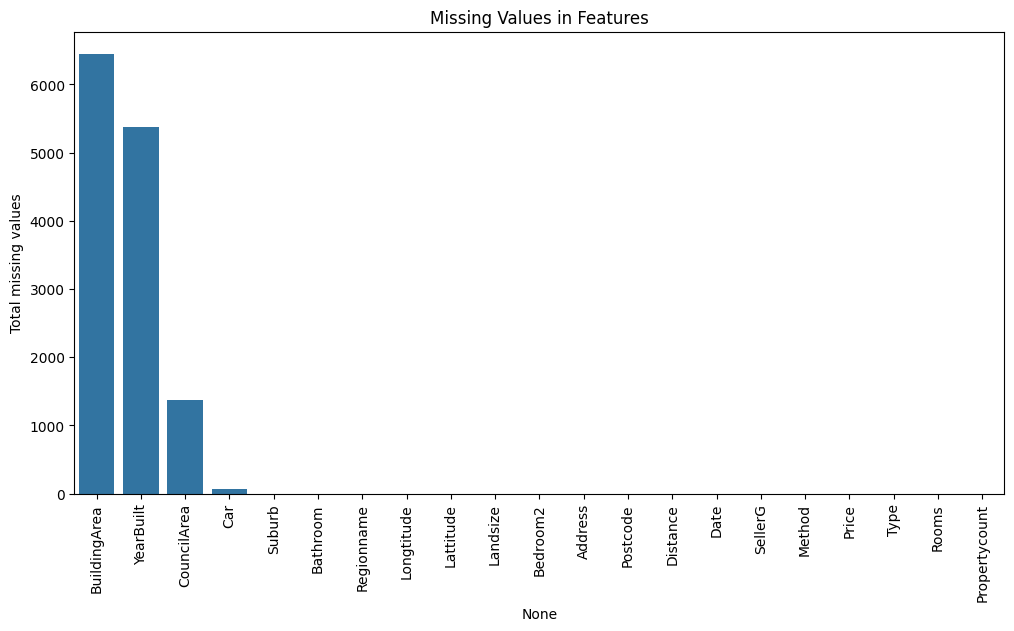

In [9]:
import seaborn as sns
missing_values  = data.isnull().sum().sort_values(ascending = False)
missing_df = pd.concat([missing_values], axis = 1, keys = ['Total'])
f, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = missing_values.index, y = missing_values)
plt.xticks(rotation = 90)
plt.title('Missing Values in Features')
plt.ylabel('Total missing values')
plt.show()

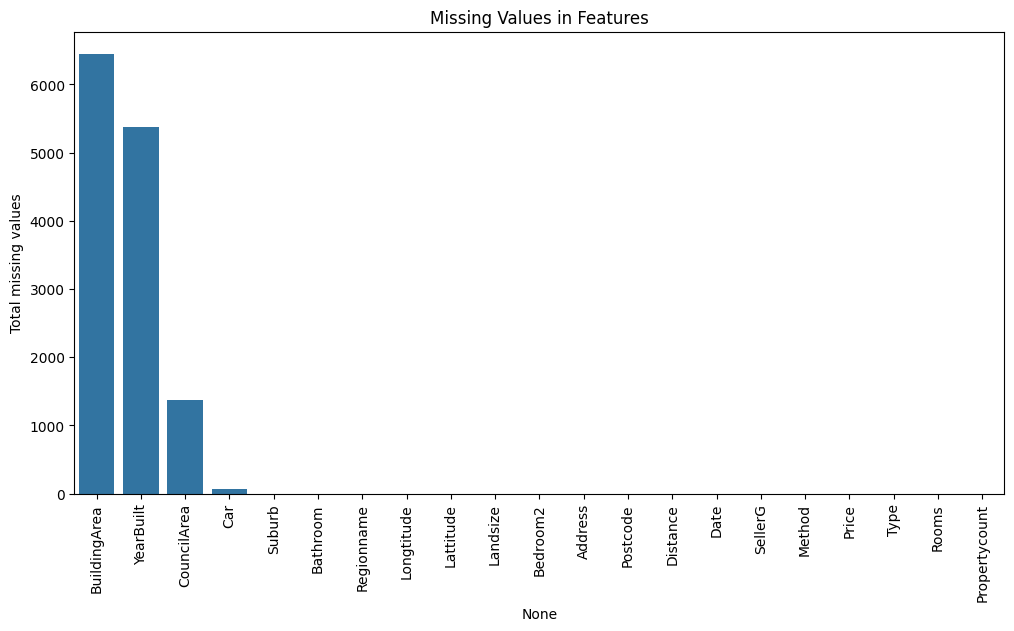

In [10]:
import seaborn as sns
missing_values  = data.isnull().sum().sort_values(ascending = False)
missing_df = pd.concat([missing_values], axis = 1, keys = ['Total'])
f, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = missing_values.index, y = missing_values)
plt.xticks(rotation = 90)
plt.title('Missing Values in Features')
plt.ylabel('Total missing values')
plt.show()

In [11]:
cat_features = ['Suburb', 'Address','Type', 'Method','SellerG','Postcode','CouncilArea','Regionname']
data[cat_features] = data[cat_features].astype('category')

In [12]:
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [13]:
data.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,12794,2,0,1480000.0,1,23,3/12/2016,2.5,53,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
1,0,5943,2,0,1035000.0,1,23,4/02/2016,2.5,53,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0


In [14]:
pd.to_datetime(data.YearBuilt, format='%Y', errors = 'coerce').dt.to_period('Y')

0         NaT
1        1900
2        1900
3         NaT
4        2014
         ... 
13575    1981
13576    1995
13577    1997
13578    1920
13579    1920
Name: YearBuilt, Length: 13580, dtype: period[A-DEC]

In [15]:
data.YearBuilt

0           NaN
1        1900.0
2        1900.0
3           NaN
4        2014.0
          ...  
13575    1981.0
13576    1995.0
13577    1997.0
13578    1920.0
13579    1920.0
Name: YearBuilt, Length: 13580, dtype: float64

In [16]:
data = data.dropna()

In [17]:
data.shape

(6830, 21)

In [18]:
data['Age'] = 2021 - data['YearBuilt']
data.drop('YearBuilt',axis = 1)
data.to_csv('nona.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6830 entries, 1 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6830 non-null   int16  
 1   Address        6830 non-null   int16  
 2   Rooms          6830 non-null   int64  
 3   Type           6830 non-null   int8   
 4   Price          6830 non-null   float64
 5   Method         6830 non-null   int8   
 6   SellerG        6830 non-null   int16  
 7   Date           6830 non-null   object 
 8   Distance       6830 non-null   float64
 9   Postcode       6830 non-null   int16  
 10  Bedroom2       6830 non-null   float64
 11  Bathroom       6830 non-null   float64
 12  Car            6830 non-null   float64
 13  Landsize       6830 non-null   float64
 14  BuildingArea   6830 non-null   float64
 15  YearBuilt      6830 non-null   float64
 16  CouncilArea    6830 non-null   int8   
 17  Lattitude      6830 non-null   float64
 18  Longtitude  

In [20]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
1,0,5943,2,0,1035000.0,1,23,4/02/2016,2.5,53,...,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0,121.0
2,0,9814,3,0,1465000.0,3,23,4/03/2017,2.5,53,...,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0,121.0
4,0,10589,4,0,1600000.0,4,155,4/06/2016,2.5,53,...,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0,7.0
6,0,2142,3,0,1876000.0,1,155,7/05/2016,2.5,53,...,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0,111.0
7,0,13335,2,0,1636000.0,1,155,8/10/2016,2.5,53,...,2.0,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0,131.0


In [21]:
cols_to_keep  = [ 'Rooms', 'Distance', 'Landsize',  'Bathroom', 'Car',
       'BuildingArea',   'Lattitude',
       'Longtitude', 'Age','Price']
data_new = data[cols_to_keep]
print(data_new.head(3))

   Rooms  Distance  Landsize  Bathroom  Car  BuildingArea  Lattitude  \
1      2       2.5     156.0       1.0  0.0          79.0   -37.8079   
2      3       2.5     134.0       2.0  0.0         150.0   -37.8093   
4      4       2.5     120.0       1.0  2.0         142.0   -37.8072   

   Longtitude    Age      Price  
1    144.9934  121.0  1035000.0  
2    144.9944  121.0  1465000.0  
4    144.9941    7.0  1600000.0  


In [22]:
data_new.isnull().sum()

Rooms           0
Distance        0
Landsize        0
Bathroom        0
Car             0
BuildingArea    0
Lattitude       0
Longtitude      0
Age             0
Price           0
dtype: int64

In [23]:
data_new.describe()

,Rooms,Distance,Landsize,Bathroom,Car,BuildingArea,Lattitude,Longtitude,Age,Price
count,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6.830000e+03
mean,2.978184,10.148960,487.495461,1.594143,1.606881,143.446606,-37.808012,144.991877,56.555930,1.077604e+06
std,0.970479,5.991423,910.805627,0.714366,0.944613,89.970692,0.080042,0.104983,37.706332,6.733202e+05
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-38.164920,144.542370,3.000000,1.310000e+05
25%,2.000000,6.100000,167.000000,1.000000,1.000000,93.000000,-37.856797,144.925522,21.000000,6.300000e+05
50%,3.000000,9.200000,404.000000,1.000000,2.000000,126.000000,-37.802190,144.997000,51.000000,8.900000e+05
75%,4.000000,13.000000,641.000000,2.000000,2.000000,173.000000,-37.756900,145.056100,81.000000,1.334000e+06
max,8.000000,47.400000,37000.000000,8.000000,10.000000,3112.000000,-37.408530,145.526350,825.000000,9.000000e+06


In [24]:
x = data_new.drop(['Price'], axis=1)

y = data_new['Price']
x.shape, y.shape

((6830, 9), (6830,))

In [25]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [34]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [35]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [36]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)


LinearRegression()

In [37]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 272510.9378644592


In [38]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error', k )

Test Mean Absolute Error 273889.2428589401


In [39]:
lr.coef_

array([ 1.86327756e+05, -3.54445015e+04,  3.02465535e+01,  1.97838222e+05,
        6.79700676e+04,  1.79801255e+03, -1.44778606e+06,  8.14698682e+05,
        4.28204536e+03])

In [40]:
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
3921,920000.0,1.055546e+06,-1.355459e+05
5631,5700000.0,2.109356e+06,3.590644e+06
6750,670000.0,5.003396e+05,1.696604e+05
8893,1385000.0,1.086281e+06,2.987190e+05
11726,447000.0,3.290408e+05,1.179592e+05


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [50]:
# Create a pipeline with StandardScaler and LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())

# Fitting the model with train data
model.fit(train_x, train_y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [51]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 1080148.813304591


C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [52]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error', k )

Test Mean Absolute Error 1069618.806653621


C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
